Formato do stack: (26, 50, 51)


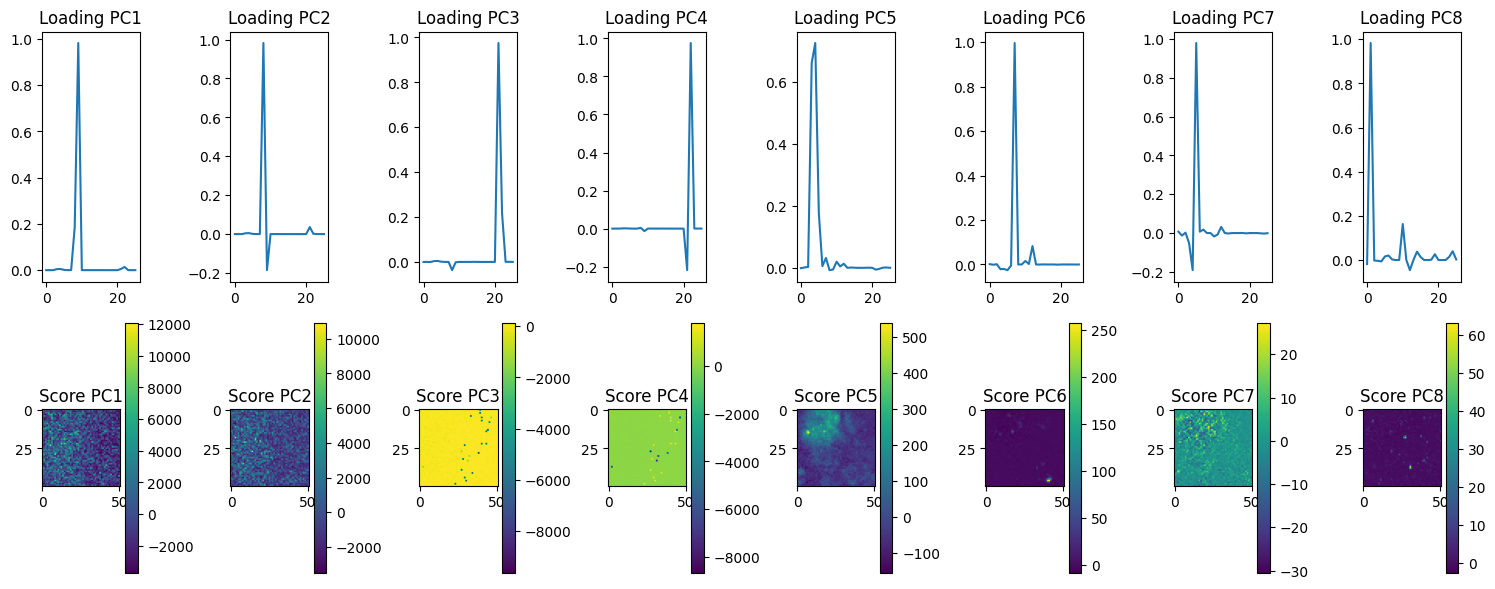

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import tifffile
import glob

# --- Carregar todos os TIFFs da pasta ---
file_list = sorted(glob.glob("images_tiff/A11/*.tif"))  # todos os mapas da pasta
maps = [tifffile.imread(f) for f in file_list]

stack = np.stack(maps, axis=0)  # shape: (n_maps, H, W)
print("Formato do stack:", stack.shape)

# --- Reorganizar dados ---
n_maps, H, W = stack.shape
X = stack.reshape(n_maps, -1).T  # (pixels, n_maps)

# --- PCA ---
n_components = 8
pca = PCA(n_components=n_components)
scores = pca.fit_transform(X)
loadings = pca.components_

# --- Reconstruir imagens ---
pca_images = scores.T.reshape(n_components, H, W)

# --- Plot ---
fig, axes = plt.subplots(2, n_components, figsize=(15, 6))
for i in range(n_components):
    axes[0, i].plot(loadings[i])
    axes[0, i].set_title(f"Loading PC{i+1}")
    im = axes[1, i].imshow(pca_images[i], cmap="viridis")
    axes[1, i].set_title(f"Score PC{i+1}")
    plt.colorbar(im, ax=axes[1, i])
plt.tight_layout()
plt.show()
